<a href="https://colab.research.google.com/github/LaizaCostaa/Customer_segmentation_k-means/blob/main/customer_segmentation_k_means_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [106]:
df = pd.read_csv('mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
df.shape

(200, 5)

In [108]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [109]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [110]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [111]:
plt.style.use('fivethirtyeight')

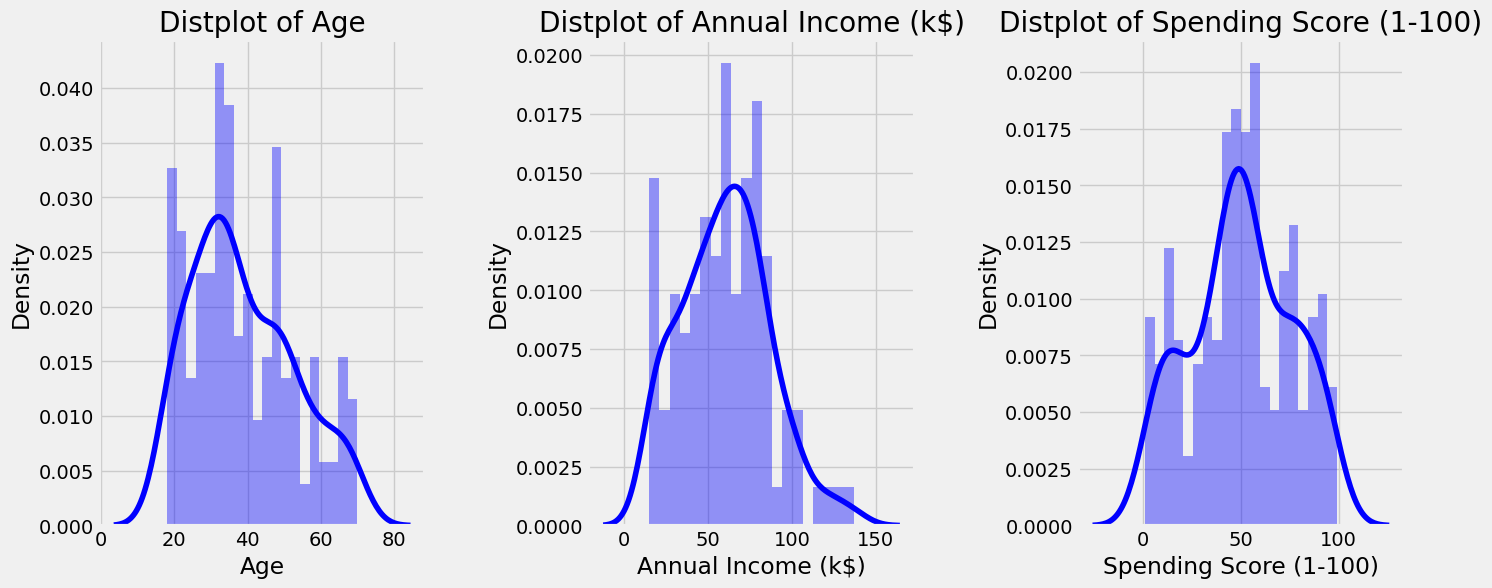

In [112]:
plt.figure(figsize=(15, 6))

variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.distplot(df[var], bins=20, color='blue')  # Alterando a cor para verde, mas pode ser outra cor
    plt.title('Distplot of {}'.format(var))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

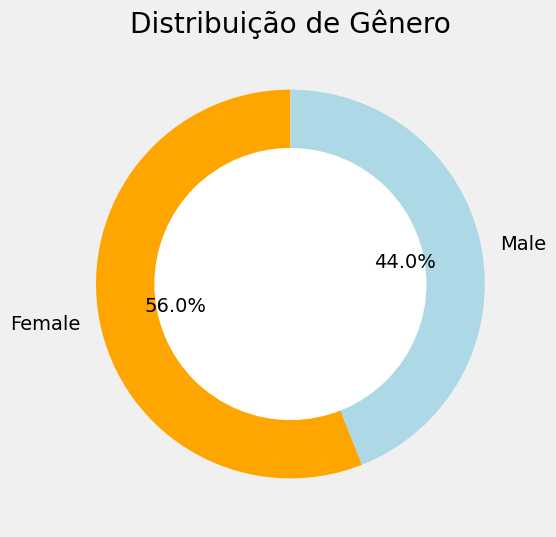

In [113]:

# Counplot of gender
gender_counts = df['Gender'].value_counts()


plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribuição de Gênero')


plt.show()

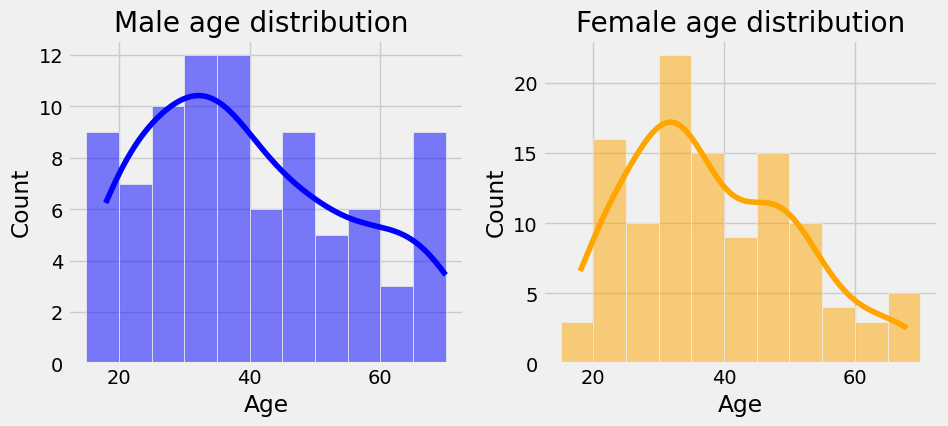

In [114]:
# Distribution of age by gender
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='blue', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = 'orange', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");

plt.show()

In [115]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


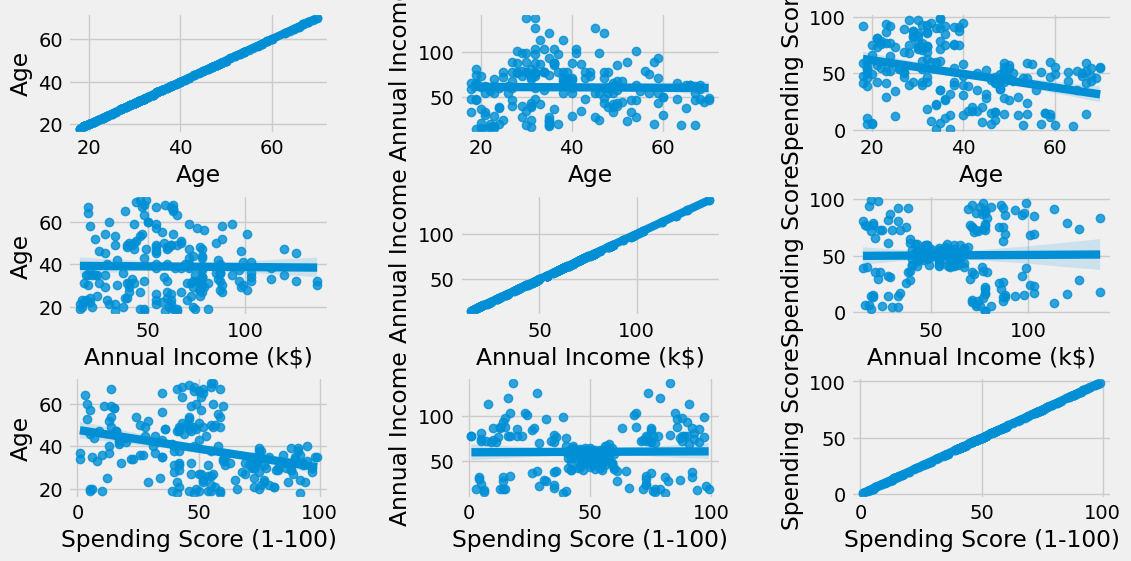

In [116]:
plt.figure(1 , figsize = (12 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

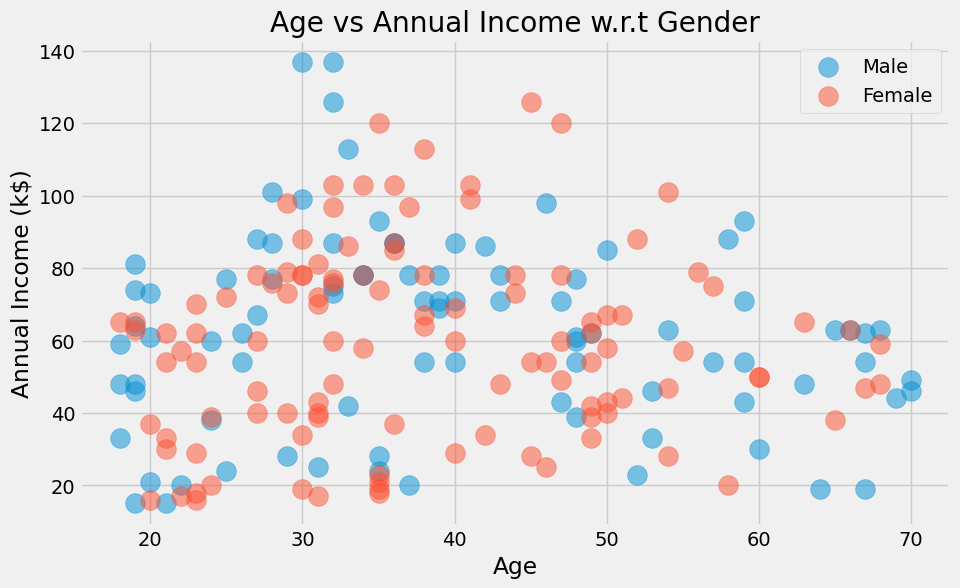

In [117]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

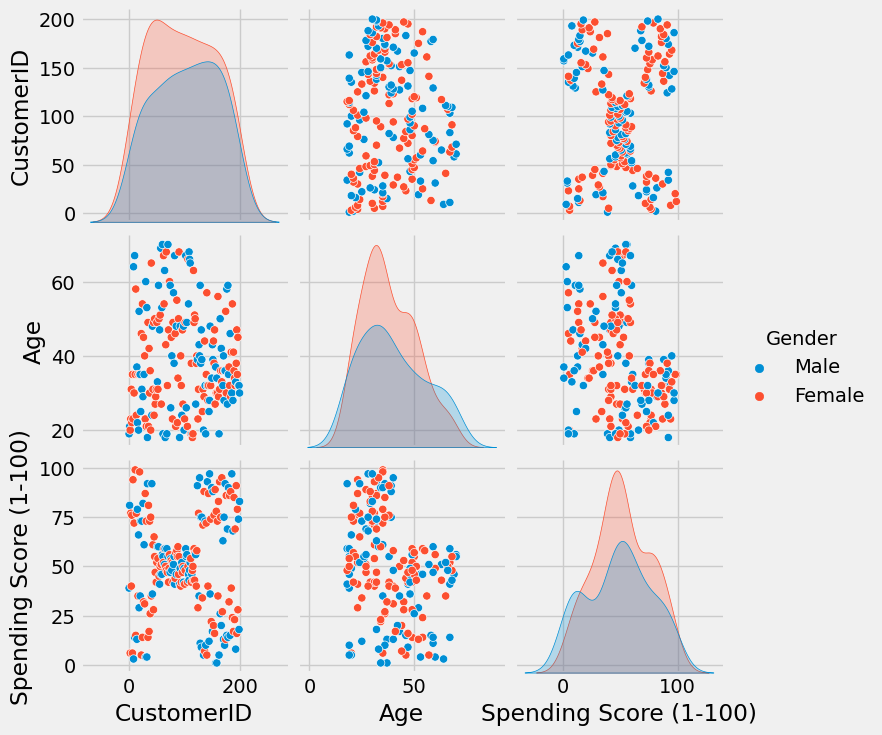

In [118]:
sns.pairplot(df.drop("Annual Income (k$)", axis = 1), hue = "Gender");

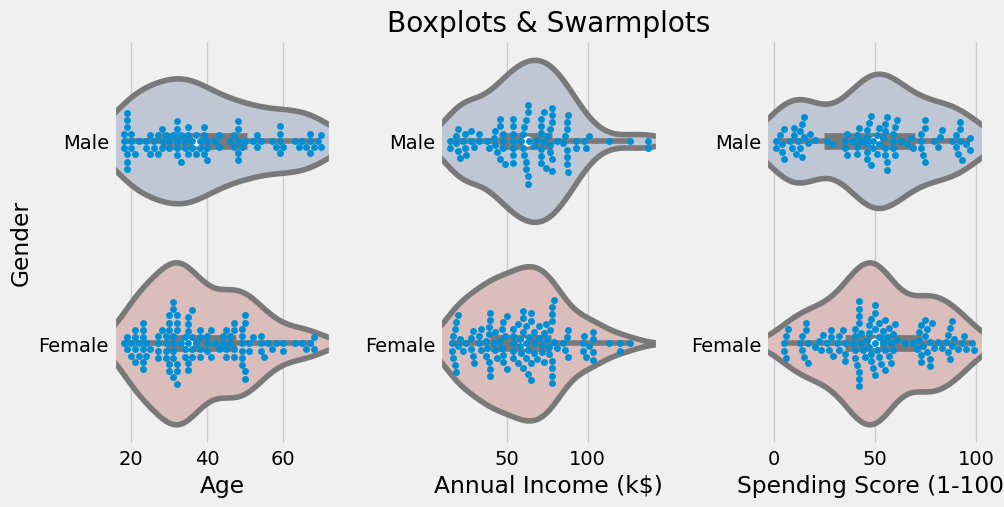

In [120]:
plt.figure(1 , figsize = (10, 5))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

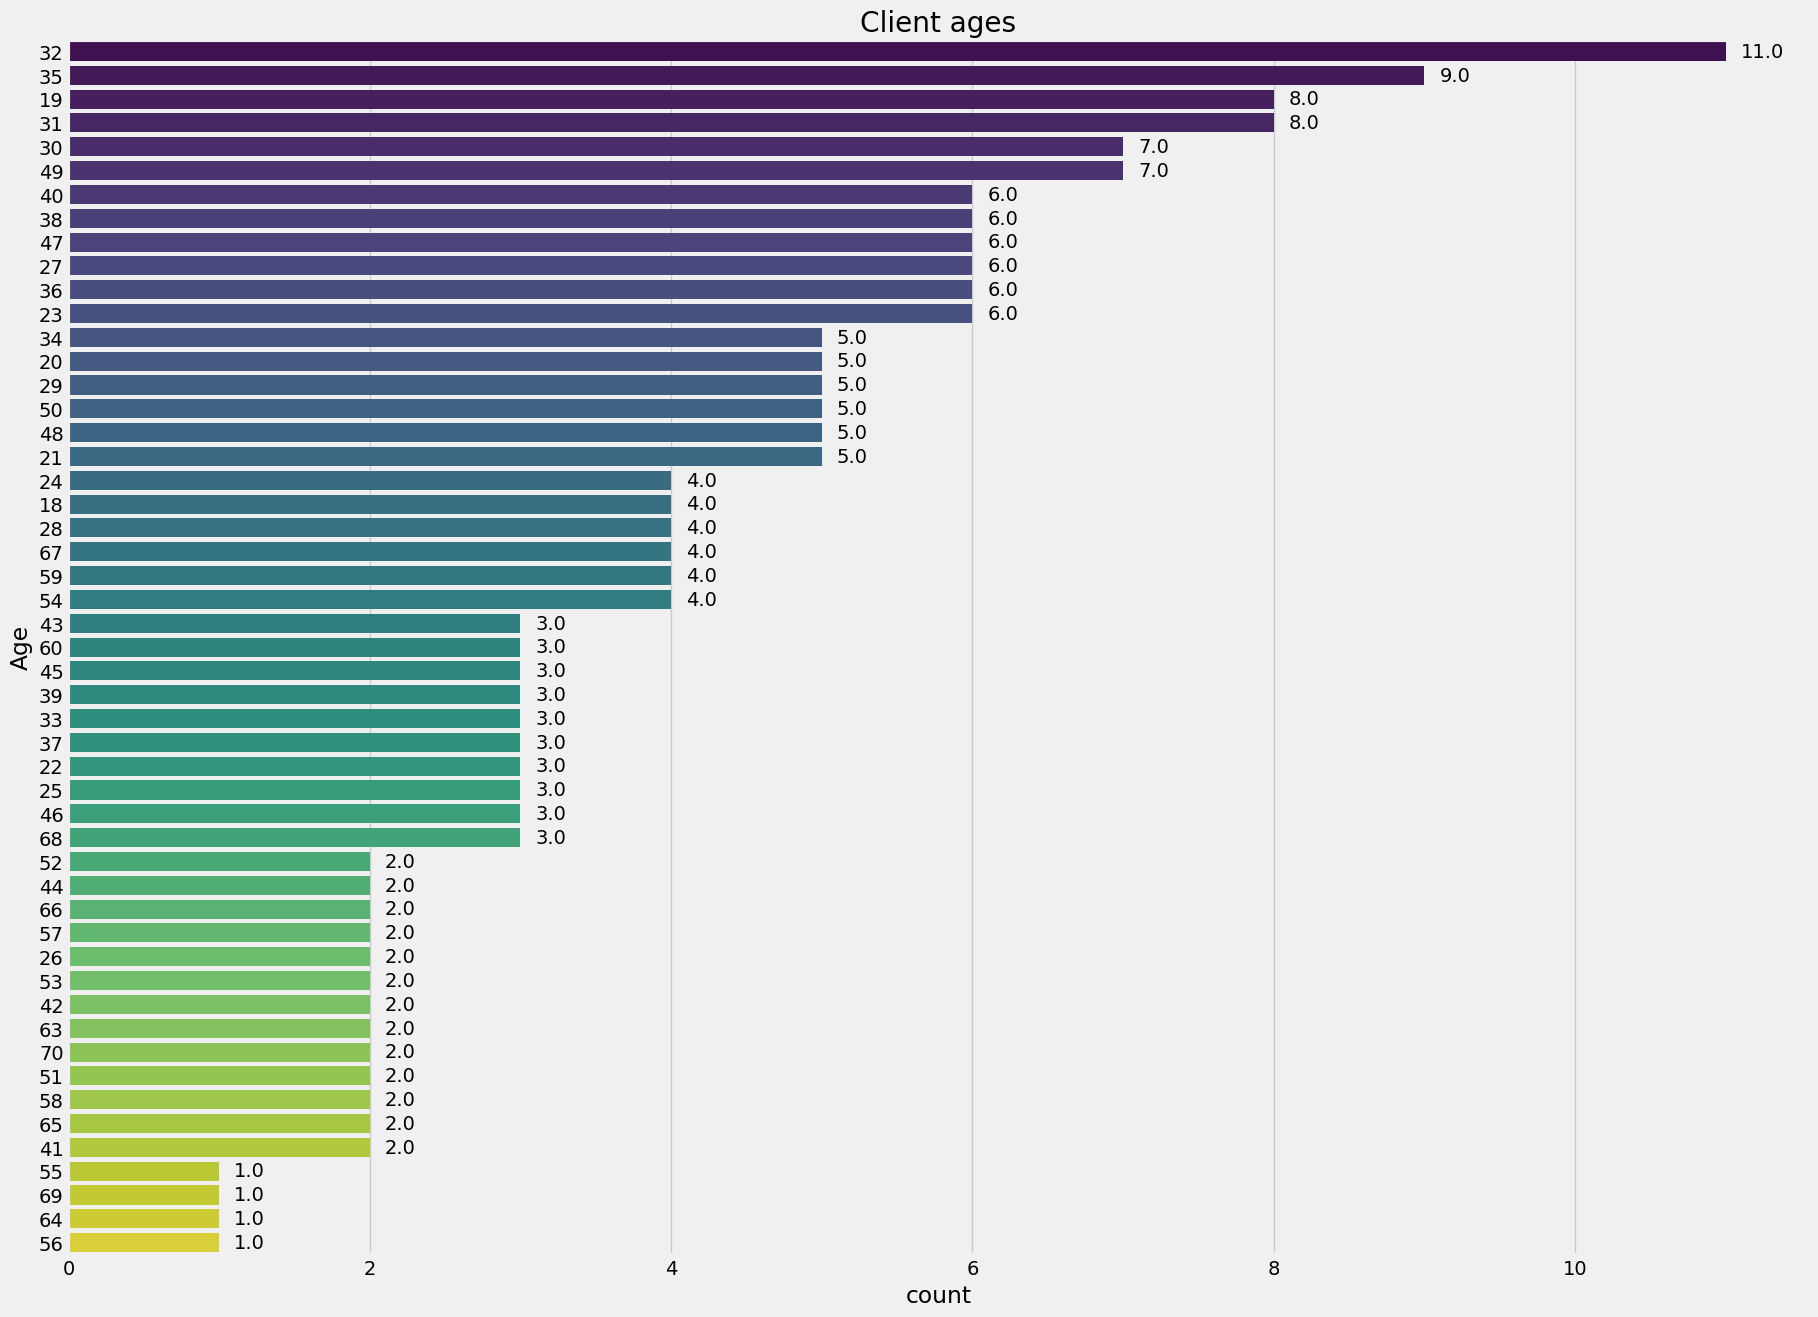

In [121]:
plt.figure(figsize=(20, 15))

# "Creating the bar chart sorting by count
ax = sns.countplot(y='Age', data=df, order=df['Age'].value_counts().index, palette='viridis')

# putting values on bars
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2, f'{p.get_width()}', ha='left', va='center')


plt.title('Client ages')


plt.show()

In [122]:
'''Age and spending Score'''

age_spending = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(age_spending)
    inertia.append(algorithm.inertia_)

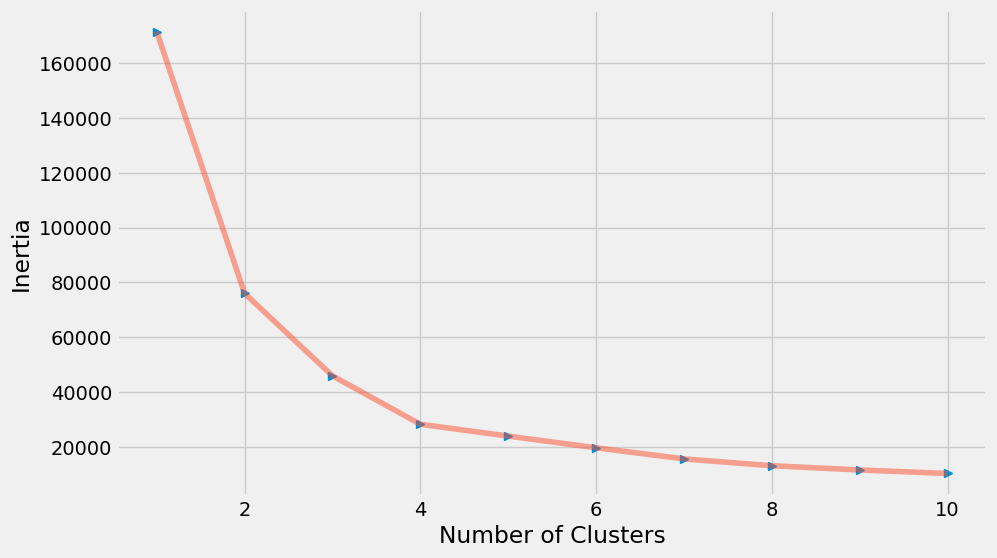

In [123]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , '>')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [124]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=800,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(age_spending)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [125]:
h = 0.02
x_min, x_max = age_spending[:, 0].min() - 1, age_spending[:, 0].max() + 1
y_min, y_max = age_spending[:, 1].min() - 1, age_spending[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

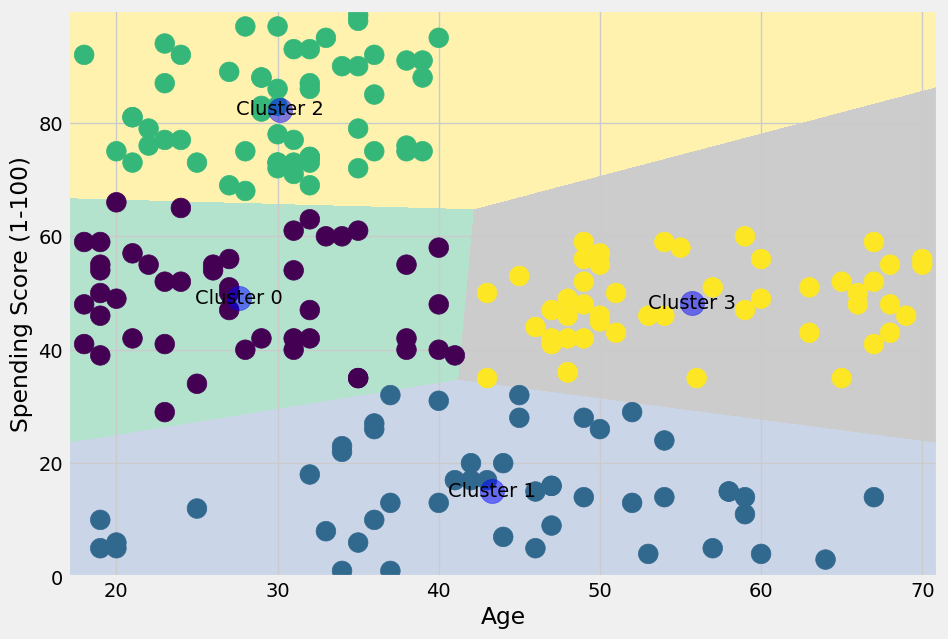

In [126]:
plt.figure(1, figsize=(10, 7))
plt.clf()

Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1, s=200)

# labeling the clusters
for cluster_label, centroid in enumerate(centroids1):
    plt.scatter(x=centroid[0], y=centroid[1], s=300, c='blue', alpha=0.5)
    plt.text(centroid[0], centroid[1], f'Cluster {cluster_label}', fontsize=14, color='black', ha='center', va='center')

plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

In [127]:
'''Annual Income and spending Score'''

income_spending = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(income_spending)
    inertia.append(algorithm.inertia_)


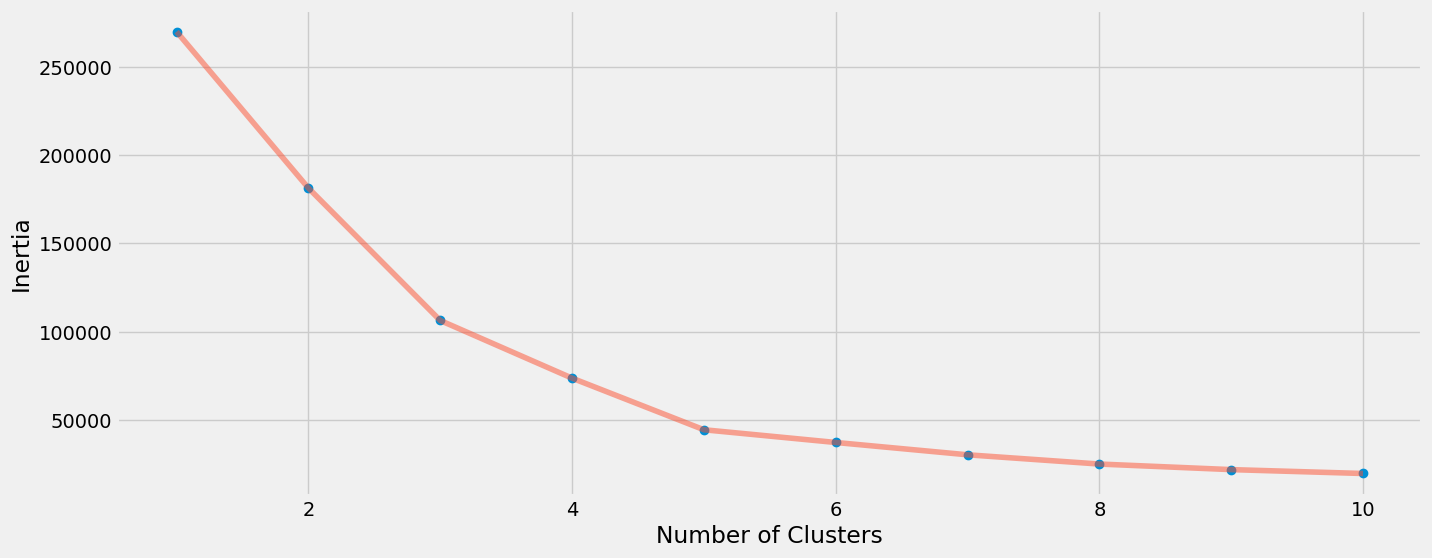

In [128]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [129]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(income_spending)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [130]:
h = 0.02
x_min, x_max = income_spending[:, 0].min() - 1, income_spending[:, 0].max() + 1
y_min, y_max = income_spending[:, 1].min() - 1, income_spending[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

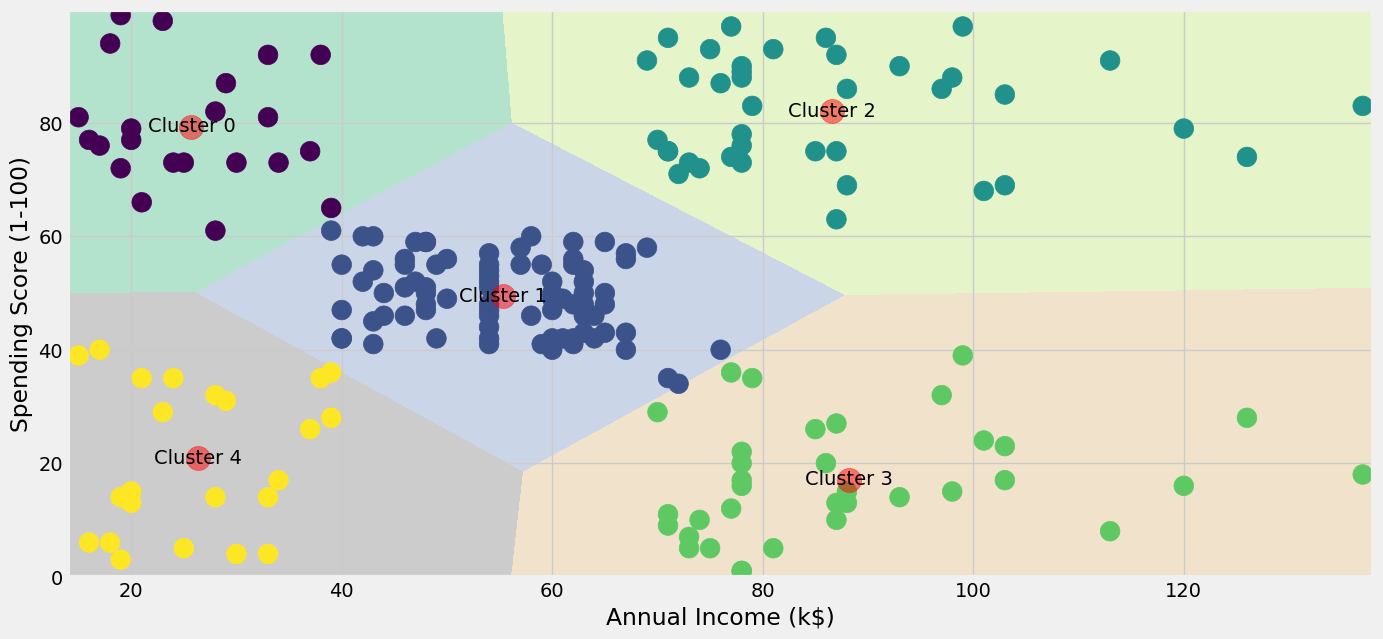

In [131]:
plt.figure(1, figsize=(15, 7))
plt.clf()

Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels2, s=200)

# Adiciona rótulo a cada cluster
for cluster_label, centroid in enumerate(centroids2):
    cluster_points = df[labels2 == cluster_label]
    cluster_center = centroid
    plt.scatter(x=cluster_center[0], y=cluster_center[1], s=300, c='red', alpha=0.5)

    # Calcula o ponto médio do cluster para colocar o rótulo
    mid_point = cluster_points[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

    plt.text(mid_point[0], mid_point[1], f'Cluster {cluster_label}', fontsize=14, color='black', ha='center', va='center')

plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()



Cluster 0. Clientes com renda anual baixa e gastos anuais altos.

Cluster 1. Clientes com renda anual média e gastos anuais médios

Cluster 2. Clientes com renda anual alta e gastos anuais altos.

Cluster 3. Clientes com renda anual alta, mas gastos anuais baixos.

Cluster 4. Clientes com renda anual baixa, mas gastos anuais médios.



In [132]:
'''AGE, Annual Income and spending Score'''

age_income_spending = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(age_income_spending)
    inertia.append(algorithm.inertia_)


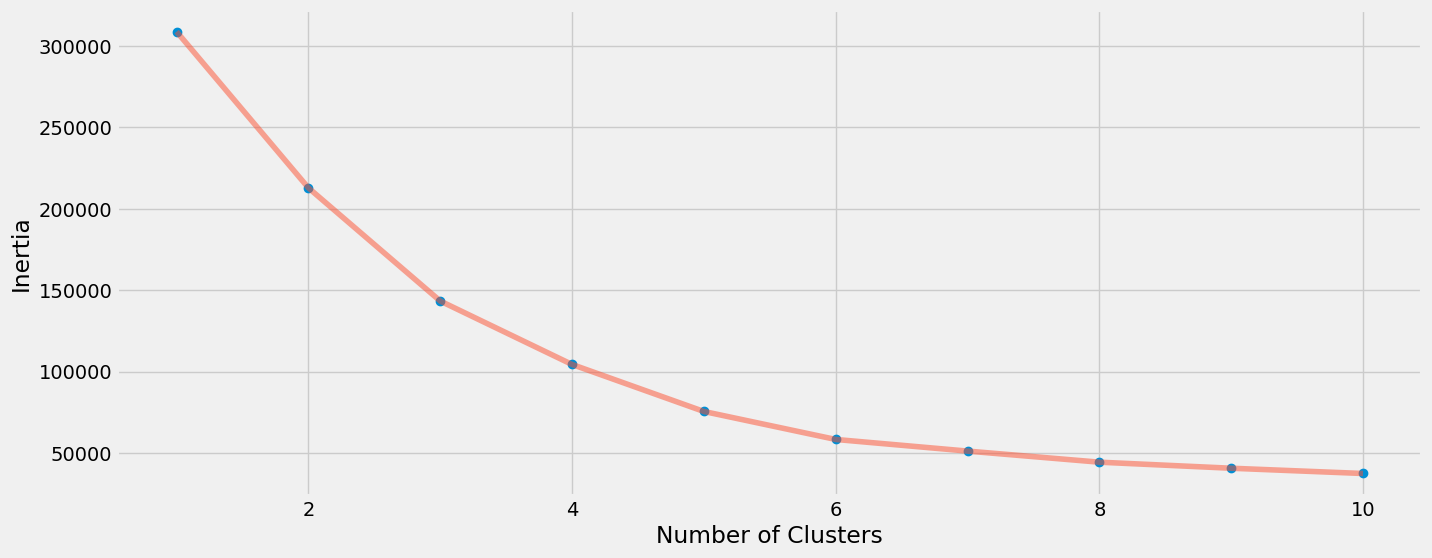

In [133]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [134]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(age_income_spending)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

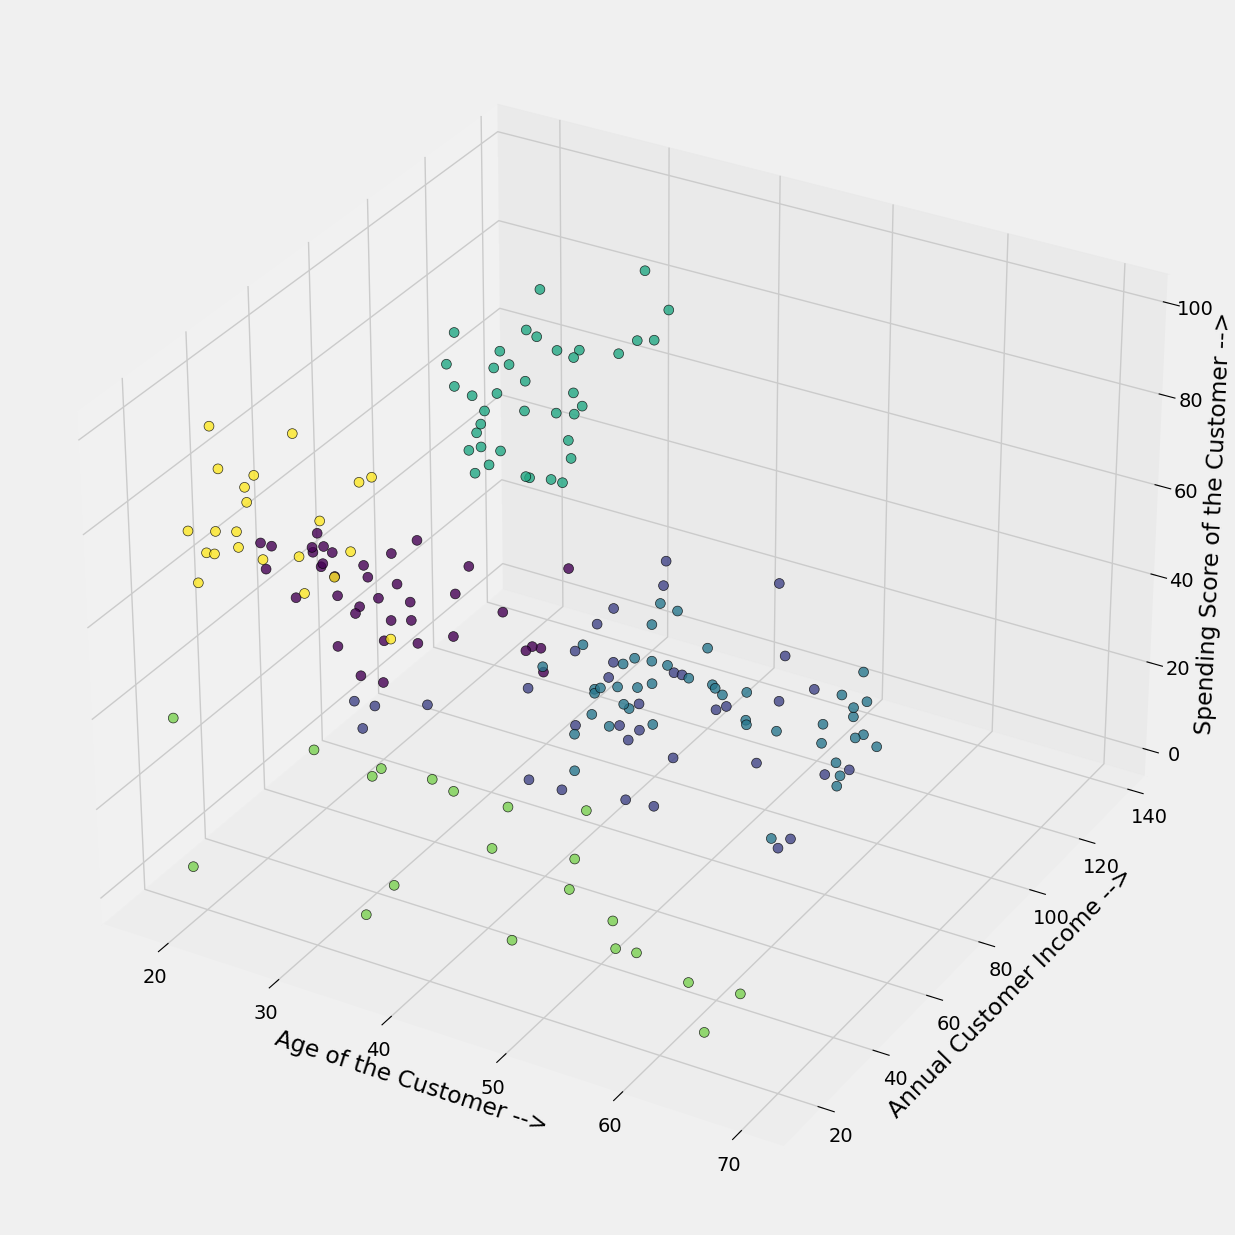

In [145]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3d scatterplot
age = df['Age']
annual_income = df['Annual Income (k$)']
spending_score = df['Spending Score (1-100)']

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Age of the Customer -->')
ax.set_ylabel('Annual Customer Income -->')
ax.set_zlabel('Spending Score of the Customer -->')

# adding the dots
ax.scatter(age, annual_income, spending_score, c=df['label3'], s=50, alpha=0.8, edgecolors='k', cmap='viridis')

plt.show()